# Закон Кюри-Вейсса

### Оценим допустимую ЭДС

In [1]:
delta_T = 0.5
k = 24
E = delta_T/k
print(E, "мВ")

0.020833333333333332 мВ


## Исследуем зависимость периода колебаний $\tau$ от температуры $T$

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics

In [3]:
df = pd.read_csv('main.csv')
df

,t,T
0,4,273
1,5,300


In [4]:
# TODO: Поменять на экспериментальное
t0 = 1

In [5]:
X = df.t
Y = np.divide(1, np.power(X, 2) - np.power(t0, 2))

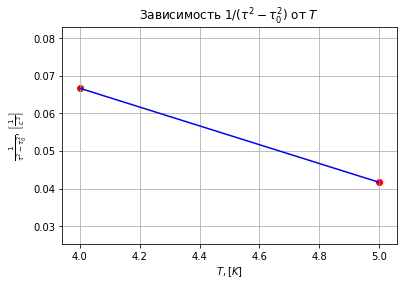

In [6]:
# Строим регрессию
regressor = linear_model.LinearRegression()
regressor.fit(X.values.reshape(-1, 1), Y.values.reshape(-1, 1))
Y_pred = regressor.predict(X.values.reshape(-1, 1))

f = plt.subplot()
f.scatter(X, Y, label='Exper. data', c='r')
f.plot(X, Y_pred, label='Linear regression', c='b')
f.set_title(r'Зависимость ${1}/{(\tau^2 - \tau_0^2)}$ от $T$')
f.grid(True, which='major')
f.grid(True, which='minor')
f.set_ylabel(r'$\frac{1}{\tau^2-\tau_0^2}$, $\left[\frac{1}{\,c^2}\right]$')
f.set_xlabel(r'$T, [K]$')

plt.savefig('out.pdf', fmt='pdf')
plt.show(f)

In [41]:
print("Уголовой коэффициент: {} \nТочка пересечения (константный признак): {}\nСтандартное отклонение: {}".format(regressor.coef_[0][0], regressor.intercept_[0], metrics.mean_squared_error(Y, Y_pred)))

Уголовой коэффициент: -0.02499999999999999 
Точка пересечения (константный признак): 0.16666666666666663
Стандартное отклонение: 2.407412430484045e-35
